# Polynomial Regression
# By Giriraj Vaishnav

In [2]:
# Import packages and classes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
%matplotlib inline

In [3]:
# Read the Position_Salaries.csv file
salary=pd.read_csv('Position_Salaries.csv')
print(salary)

            Position  Level   Salary
0   Business Analyst      1    45000
1  Junior Consultant      2    50000
2  Senior Consultant      3    60000
3            Manager      4    80000
4    Country Manager      5   110000
5     Region Manager      6   150000
6            Partner      7   200000
7     Senior Partner      8   300000
8            C-level      9   500000
9                CEO     10  1000000


In [4]:
# Print first 5 data
salary.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [5]:
# Print last 5 data
salary.tail()

,Position,Level,Salary
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [6]:
# Print mathematical description
salary.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


In [7]:
# Print information of Dataset
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 264.0+ bytes


In [8]:
# Divide the data into “Attributes” and “labels”
X = salary[['Level']]
y = salary['Salary']

# X = salary.iloc[:,1:2].values  
# y = salary.iloc[:,2].values

In [9]:
# Create a Linear Regression model and fit it
lin_reg =LinearRegression(fit_intercept=True)
lin_reg.fit(X,y)

LinearRegression()

In [10]:
# Getting Results
print('Linear Model Coeff (m) =' , lin_reg.coef_)
print('Linear Model Coeff (b) =' , lin_reg.intercept_)

Linear Model Coeff (m) = [80878.78787879]
Linear Model Coeff (b) = -195333.33333333337


Text(0.5, 1.0, 'Position Level vs. Salary')

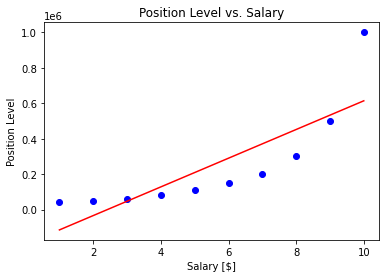

In [11]:
# Scatter plot for Linear Regression
plt.scatter(X,y,color='blue')
plt.plot(X,lin_reg.predict(X),color='red')
plt.ylabel('Position Level')
plt.xlabel('Salary [$]')
plt.title('Position Level vs. Salary')

In [13]:
# Get Results

r_sq = lin_reg.score(X, y)
print('coefficient of determination:', r_sq)
print('intercept:', lin_reg.intercept_)
print('coefficients:', lin_reg.coef_)

coefficient of determination: 0.6690412331929895
intercept: -195333.33333333337
coefficients: [80878.78787879]


In [14]:
# Create a Polynomial Regression model and fit it

poly_reg = PolynomialFeatures(degree= 4)  
x_poly = poly_reg.fit_transform(X)  
lin_reg_2 = LinearRegression()  
lin_reg_2.fit(x_poly, y)  

LinearRegression()

Text(0.5, 1.0, 'Position Level vs. Salary')

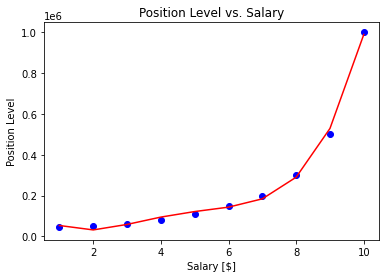

In [15]:
# Scatter plot for Polynomial Regression
plt.scatter(X,y,color='blue')
plt.plot(X,lin_reg_2.predict(poly_reg.fit_transform(X)),color='red')
plt.ylabel('Position Level')
plt.xlabel('Salary [$]')
plt.title('Position Level vs. Salary')

In [16]:
# Get Results

r_sq = lin_reg_2.score(x_poly, y)
print('coefficient of determination:', r_sq)
print('intercept:', lin_reg_2.intercept_)
print('coefficients:', lin_reg_2.coef_)

coefficient of determination: 0.9973922891706613
intercept: 184166.66666727886
coefficients: [      0.         -211002.33100292   94765.44289063  -15463.28671331
     890.15151515]


In [17]:
# Prediction the revenve using Temperature Value directly
print('---------1.5---------')
level = 1.5
sal = lin_reg_2.predict(poly_reg.fit_transform([[level]]))
print(sal)
print('--------5.0----------')
level = 5.0
sal = lin_reg_2.predict(poly_reg.fit_transform([[level]]))
print(sal)
print('--------9.5----------')
level = 9.5
sal = lin_reg_2.predict(poly_reg.fit_transform([[level]]))
print(sal)

---------1.5---------
[33203.21605486]
--------5.0----------
[121724.94172501]
--------9.5----------
[724730.0225814]
